In [99]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import pandas as pd
import seaborn as sns
import seaborn as sb 
 
#Import Data
Y2019_df = pd.read_csv('../data/2019.csv')
world_2021 = pd.read_csv('../data/2021.csv')
world_df = pd.read_csv('../data/world_happiness.csv')

#Renaming Column Names
world_df.rename(columns={'Country name': 'Country'}, inplace=True)
world_df.rename(columns={'Life Ladder': 'Score'}, inplace=True)
world_2021.rename(columns={'Country name': 'Country'}, inplace=True)


In [100]:
world_2021.head()

,Country,Regional indicator,Score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [101]:
# Which countries were the happiest in 2021?
happiest_df = world_2021[['Country', 'Score']].head()
happiest_df


,Country,Score
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464


In [102]:
# Which countries were the unhappiest 2021?
unhappiest_df = world_2021[['Country', 'Score']].tail()
unhappiest_df

,Country,Score
144,Lesotho,3.512
145,Botswana,3.467
146,Rwanda,3.415
147,Zimbabwe,3.145
148,Afghanistan,2.523


In [103]:
happiest_unhappiest_countries = world_2021[world_2021["Country"].isin([
                                                                'Finland', 
                                                                'Denmark',
                                                                'Switzerland',
                                                                'Iceland',
                                                                'Netherlands',
                                                                'Lesotho',
                                                                'Botswana',
                                                                'Rwanda',
                                                                'Zimbabwe',
                                                                'Afghanistan'
                                                                ])]

happiest_unhappiest_countries.sort_values(by='Score', ascending=False).set_index('Country')


,Regional indicator,Score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country,,,,,,,,,,,,,,,,,,,
Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [104]:
graphing_happies_unhappiest = happiest_unhappiest_countries[['Country', 'Score']]
# .set_index('Country name')
graphing_happies_unhappiest


,Country,Score
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464
144,Lesotho,3.512
145,Botswana,3.467
146,Rwanda,3.415
147,Zimbabwe,3.145
148,Afghanistan,2.523


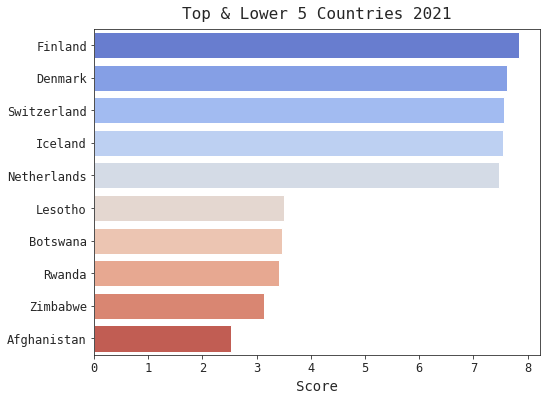

In [105]:
# Set the figure size
plt.figure(figsize = (8,6))

# Plot
ax = sns.barplot(x='Score', y='Country', data=graphing_happies_unhappiest, palette='coolwarm')
sns.set_style("ticks")

# Set the title, the labels, and custom ticks
plt.title("Top & Lower 5 Countries 2021", fontsize = 16, pad=10)
ax.set_xlabel("Score", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

plt.show()


In [106]:
Nato_countries = world_df[world_df["Country"].isin([
                                                                'Belgium', 
                                                                'Canada',
                                                                'Denmark',
                                                                'France',
                                                                'Germany',
                                                                'Hungary',
                                                                'Iceland',
                                                                'Italy',
                                                                'Netherlands',
                                                                'Poland',
                                                                'Romania',
                                                                'United States'
                                                                ])]

Nato = Nato_countries[['Country', 'year', 'Score']]
Nato



,Country,year,Score
147,Belgium,2005,7.262
148,Belgium,2007,7.219
149,Belgium,2008,7.117
150,Belgium,2010,6.854
151,Belgium,2011,7.111
...,...,...,...
1846,United States,2016,6.804
1847,United States,2017,6.992
1848,United States,2018,6.883
1849,United States,2019,6.944


In [107]:
#graph
world_2021.describe()

,Score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [108]:
world_2021

,Country,Regional indicator,Score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [109]:
# What are the factors contributing to happiness?
world_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Score                                       149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [110]:
Afghanistan_df = world_df.loc[(world_df["Country"] == "Afghanistan")]
Afghanistan_df



,Country,year,Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


In [111]:
China_df = world_df.loc[(world_df["Country"] == "China")]
China_df

# NO PERCEPTION OF CORRUPTION. NO DATA IS DATA!!

,Country,year,Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
342,China,2006,4.560,8.696,0.747,66.88,NaN,NaN,NaN,0.809,0.170
343,China,2007,4.863,8.824,0.811,67.06,NaN,-0.176,NaN,0.817,0.159
344,China,2008,4.846,8.911,0.748,67.24,0.853,-0.092,NaN,0.817,0.147
345,China,2009,4.454,8.996,0.798,67.42,0.771,-0.160,NaN,0.786,0.162
346,China,2010,4.653,9.092,0.768,67.60,0.805,-0.133,NaN,0.765,0.158
347,China,2011,5.037,9.179,0.787,67.76,0.824,-0.186,NaN,0.820,0.134
348,China,2012,5.095,9.249,0.788,67.92,0.808,-0.185,NaN,0.821,0.159
349,China,2013,5.241,9.319,0.778,68.08,0.805,-0.158,NaN,0.836,0.142
350,China,2014,5.196,9.386,0.820,68.24,NaN,-0.217,NaN,0.854,0.112
351,China,2015,5.304,9.449,0.794,68.40,NaN,-0.244,NaN,0.809,0.171


In [112]:
Russia_df = world_df.loc[(world_df["Country"] == "Russia")]
Russia_df

,Country,year,Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1440,Russia,2006,4.964,9.991,0.895,58.68,0.643,-0.307,0.935,0.611,0.232
1441,Russia,2007,5.223,10.074,0.885,59.26,0.593,-0.284,0.933,0.623,0.193
1442,Russia,2008,5.619,10.125,0.882,59.84,0.643,-0.305,0.924,0.594,0.166
1443,Russia,2009,5.158,10.044,0.908,60.42,0.617,-0.283,0.954,0.566,0.169
1444,Russia,2010,5.385,10.087,0.909,61.00,0.613,-0.296,0.937,0.589,0.171
1445,Russia,2011,5.389,10.129,0.883,61.42,0.626,-0.279,0.935,0.601,0.165
1446,Russia,2012,5.621,10.166,0.901,61.84,0.609,-0.293,0.938,0.611,0.174
1447,Russia,2013,5.537,10.182,0.881,62.26,0.661,-0.289,0.934,0.680,0.180
1448,Russia,2014,6.037,10.171,0.932,62.68,0.744,-0.265,0.869,0.688,0.151
1449,Russia,2015,5.996,10.149,0.924,63.10,0.685,-0.171,0.913,0.679,0.130


In [113]:
Ukraine_df = world_df.loc[(world_df["Country"] == "Ukraine")]
Ukraine_df

,Country,year,Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1793,Ukraine,2006,4.804,9.380,0.852,60.12,0.624,-0.257,0.929,0.622,0.249
1794,Ukraine,2007,5.252,9.459,0.820,60.64,0.494,-0.241,0.968,0.636,0.208
1795,Ukraine,2008,5.172,9.488,0.860,61.16,0.487,-0.265,0.929,0.573,0.186
1796,Ukraine,2009,5.166,9.332,0.845,61.68,0.460,-0.241,0.962,0.583,0.189
1797,Ukraine,2010,5.058,9.374,0.884,62.20,0.484,-0.189,0.954,0.513,0.227
1798,Ukraine,2011,5.083,9.431,0.859,62.50,0.579,-0.228,0.933,0.590,0.220
1799,Ukraine,2012,5.030,9.436,0.898,62.80,0.564,-0.223,0.896,0.570,0.193
1800,Ukraine,2013,4.711,9.438,0.897,63.10,0.569,-0.216,0.937,0.643,0.225
1801,Ukraine,2014,4.297,9.426,0.877,63.40,0.533,0.084,0.927,0.594,0.249
1802,Ukraine,2015,3.965,9.327,0.909,63.70,0.431,-0.033,0.952,0.574,0.241


In [114]:
Current_events_df = world_df.loc[(world_df["Country"] == "Afghanistan")]
Current_events_df

,Country,year,Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


In [115]:
# #counts the number of results in each column
# for column in world_df.columns:
#      print("\n" + column)
#      print(world_df[column].value_counts())

In [116]:

Adversaries_df = world_df[world_df["Country"].isin(['China', 'Russia'])]
Adversaries_df



,Country,year,Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
342,China,2006,4.560,8.696,0.747,66.88,NaN,NaN,NaN,0.809,0.170
343,China,2007,4.863,8.824,0.811,67.06,NaN,-0.176,NaN,0.817,0.159
344,China,2008,4.846,8.911,0.748,67.24,0.853,-0.092,NaN,0.817,0.147
345,China,2009,4.454,8.996,0.798,67.42,0.771,-0.160,NaN,0.786,0.162
346,China,2010,4.653,9.092,0.768,67.60,0.805,-0.133,NaN,0.765,0.158
347,China,2011,5.037,9.179,0.787,67.76,0.824,-0.186,NaN,0.820,0.134
348,China,2012,5.095,9.249,0.788,67.92,0.808,-0.185,NaN,0.821,0.159
349,China,2013,5.241,9.319,0.778,68.08,0.805,-0.158,NaN,0.836,0.142
350,China,2014,5.196,9.386,0.820,68.24,NaN,-0.217,NaN,0.854,0.112
351,China,2015,5.304,9.449,0.794,68.40,NaN,-0.244,NaN,0.809,0.171


In [117]:
Middle_East_df = world_df[world_df["Country"].isin(['Afghanistan', 'Iran', 'Iraq', 'Israel', 'Saudi Arabia'])]
Middle_East_df


,Country,year,Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1477,Saudi Arabia,2016,6.474,10.792,0.890,65.70,0.774,-0.132,NaN,0.793,0.266
1478,Saudi Arabia,2017,6.294,10.764,0.840,66.00,0.814,-0.131,NaN,0.775,0.306
1479,Saudi Arabia,2018,6.356,10.771,0.868,66.30,0.855,-0.192,NaN,0.764,0.288
1480,Saudi Arabia,2019,6.561,10.757,0.912,66.60,0.891,-0.147,NaN,0.732,0.238


In [118]:
#Nato Countries
world_2021 = world_df.loc[(world_df['year']>2008)]
world_2021 = pd.pivot_table(world_2021, values='Score', index=['year'], columns=['Country'])

safety = world_2021.copy()

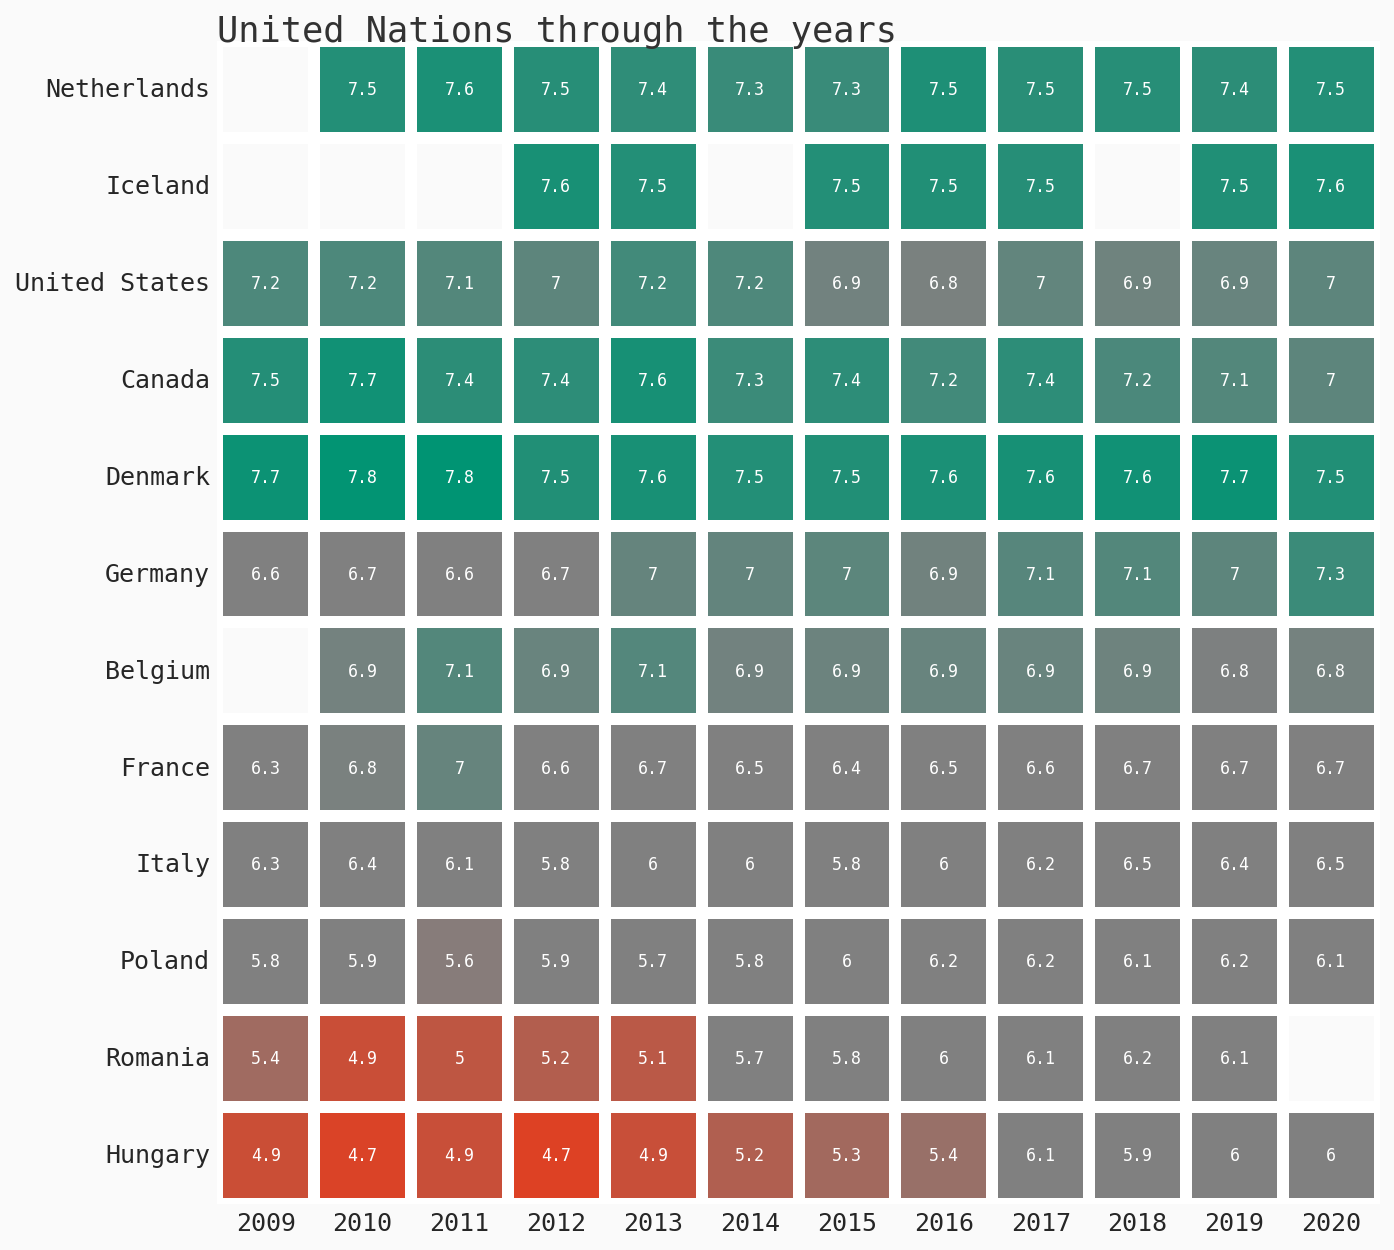

In [119]:
background_color = "#fafafa"
low_c = '#dd4124'
high_c = '#009473'
fig, ax = plt.subplots(1, 1, figsize=(10, 15), dpi=150, facecolor=background_color)
ax.set_facecolor(background_color) 

plt.rcParams["font.family"] = "monospace"

colors = [low_c,'gray','gray',high_c]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

list_of_contries = ['Netherlands','Iceland','United States','Canada','Denmark','Germany','Belgium','France','Italy','Poland','Romania','Hungary']
series_of_contries = pd.Series(list_of_contries)

sns.heatmap(world_2021[list_of_contries].T, 
            square=True,
            linewidth=5, 
            cmap=cmap, 
            cbar=False, 
            ax=ax,annot=True,annot_kws={"size": 8})

ax.spines['top'].set_visible(False)
ax.set_xlabel("")
ax.set_ylabel("")
plt.yticks(rotation=0,fontfamily='monospace',size=12)
plt.xticks(rotation=0,fontfamily='monospace', size=12)

ax.tick_params(axis=u'both', which=u'both',length=0)

ax.text(0,.00,'United Nations through the years',fontweight='normal',fontsize=17,color='#323232')


plt.show()

In [122]:
import geopandas
import pycountry

# Source: https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b

geo_temp = world_2021

def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=Country).alpha_3
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE

geo_temp['CODE']=alpha3code(geo_temp.Country)
geo_temp.head()


AttributeError: 'DataFrame' object has no attribute 'Country'